In [105]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
cr = pd.read_csv("CrCard.csv")
cr.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [107]:
cr.describe(include="all")

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319,1319,1319.000000,1319.000000,1319.000000,1319.000000
unique,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,yes,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN,NaN
freq,1023,NaN,NaN,NaN,NaN,NaN,738,1228,NaN,NaN,NaN,NaN
mean,NaN,0.456406,33.213103,3.365376,0.068732,185.057071,NaN,NaN,0.993935,55.267627,0.817286,6.996967
std,NaN,1.345267,10.142783,1.693902,0.094656,272.218917,NaN,NaN,1.247745,66.271746,0.386579,6.305812
min,NaN,0.000000,0.166667,0.210000,0.000109,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,25.416670,2.243750,0.002316,4.583333,NaN,NaN,0.000000,12.000000,1.000000,2.000000
50%,NaN,0.000000,31.250000,2.900000,0.038827,101.298300,NaN,NaN,1.000000,30.000000,1.000000,6.000000
75%,NaN,0.000000,39.416670,4.000000,0.093617,249.035800,NaN,NaN,2.000000,72.000000,1.000000,11.000000


In [108]:
cr['card'].value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [109]:
print (cr.keys())

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')


In [110]:
crd_dmy = pd.get_dummies(cr['card'])
crd_dmy.head()

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [111]:
cr = pd.concat([cr, crd_dmy], axis=1)
cr.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,no,yes
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,0,1
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,0,1
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,0,1
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,0,1
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,0,1


In [112]:
print (cr.corr())

              reports       age    income     share  expenditure  dependents  \
reports      1.000000  0.044089  0.011023 -0.159011    -0.136538    0.019731   
age          0.044089  1.000000  0.324653 -0.115697     0.014948    0.212146   
income       0.011023  0.324653  1.000000 -0.054429     0.281104    0.317601   
share       -0.159011 -0.115697 -0.054429  1.000000     0.838779   -0.082618   
expenditure -0.136538  0.014948  0.281104  0.838779     1.000000    0.052664   
dependents   0.019731  0.212146  0.317601 -0.082618     0.052664    1.000000   
months       0.048968  0.436426  0.130346 -0.055348    -0.029007    0.046512   
majorcards  -0.007304  0.009777  0.107138  0.051470     0.077514    0.010285   
active       0.207755  0.181070  0.180540 -0.023474     0.054724    0.107133   
no           0.452577 -0.000537 -0.094308 -0.388028    -0.365814    0.036126   
yes         -0.452577  0.000537  0.094308  0.388028     0.365814   -0.036126   

               months  majorcards    ac

In [113]:
print (cr.columns)

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active', 'no', 'yes'],
      dtype='object')


In [114]:
cr_drp = cr.drop(['card','owner','selfemp'],axis=1)
cr_drp.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,no,yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,0,1
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,1
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,0,1
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,1
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,0,1


In [115]:
cr['is_train'] = np.random.uniform(0,1,len(cr)) <= 0.70
cr.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,no,yes,is_train
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,0,1,True
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,0,1,True
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,0,1,True
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,0,1,True
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,0,1,True


In [116]:
train,test = cr[cr["is_train"]==True], cr[cr["is_train"]==False]
print ("No. of train data =",len(train))
print ("No. of test data =",len(test))

No. of train data = 940
No. of test data = 379


In [117]:
features = cr_drp.columns[:9]
features

Index(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active'],
      dtype='object')

In [118]:
y = pd.factorize(train["card"])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [119]:
clf = RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(train[features],y)

C:\Users\Devanjan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
print (len(train),len(y))

940 940


In [121]:
list(zip(train[features],clf.feature_importances_))

[('reports', 0.03552744279376298),
 ('age', 0.018060609591723863),
 ('income', 0.015233431281745683),
 ('share', 0.18231744537470396),
 ('expenditure', 0.7162353105264374),
 ('dependents', 0.0028222726619092507),
 ('months', 0.010806160709902545),
 ('majorcards', 0.0018778971208147082),
 ('active', 0.01711942993899957)]

In [122]:
cr_drp = cr.drop(['reports','majorcards','dependents'],axis=1)
cr_drp.head(10)

,card,age,income,share,expenditure,owner,selfemp,months,active,no,yes,is_train
0,yes,37.66667,4.5200,0.033270,124.983300,yes,no,54,12,0,1,True
1,yes,33.25000,2.4200,0.005217,9.854167,no,no,34,13,0,1,True
2,yes,33.66667,4.5000,0.004156,15.000000,yes,no,58,5,0,1,True
3,yes,30.50000,2.5400,0.065214,137.869200,no,no,25,7,0,1,True
4,yes,32.16667,9.7867,0.067051,546.503300,yes,no,64,5,0,1,True
5,yes,23.25000,2.5000,0.044438,91.996670,no,no,54,1,0,1,True
6,yes,27.91667,3.9600,0.012576,40.833330,no,no,7,5,0,1,False
7,yes,29.16667,2.3700,0.076434,150.790000,yes,no,77,3,0,1,False
8,yes,37.00000,3.8000,0.245628,777.821700,yes,no,97,6,0,1,True
9,yes,28.41667,3.2000,0.019780,52.580000,no,no,65,18,0,1,True


In [123]:
Train_IndepentVars = train.values[:, 3:6]
Train_TargetVar = train.values[:,0]
Train_IndepentVars,Train_TargetVar

(array([[4.52, 0.03326991, 124.9833],
        [2.42, 0.0052169420000000005, 9.854167],
        [4.5, 0.0041555559999999995, 15.0],
        ...,
        [4.6, 0.02651261, 101.2983],
        [3.7, 0.008998919000000001, 26.99667],
        [3.7, 0.11161860000000001, 344.1575]], dtype=object),
 array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
        'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
        'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no',
        'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
        'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',

### Decision Tree

In [124]:
dt_train_gini = DecisionTreeClassifier(criterion = "gini", 
                                       random_state = 100,
                               max_depth=6, min_samples_leaf=5)
dt_train_gini.fit(Train_IndepentVars, Train_TargetVar)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [125]:
from sklearn import tree
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

### Linear Regression and K-NN

In [126]:
train['card'].value_counts()

yes    728
no     212
Name: card, dtype: int64

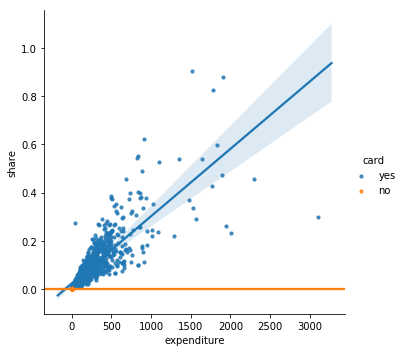

In [127]:
lin_plt = sns.lmplot("expenditure","share",data=cr,fit_reg=True,
               hue="card",scatter_kws={"marker":"D","s":10})
lin_plt

In [128]:
lin_plt.savefig("Lin_Reg plot.png")

In [129]:
cr.loc[[95]]

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,no,yes,is_train
95,yes,0,21.66667,1.56,0.000769,0.0,no,no,0,12,1,2,0,1,False


In [130]:
X = train.as_matrix(columns=["expenditure","share"])
y = np.array(train["card"])
print ("Expenditure and Share:\n",X)
print ("Card:\n",y)

C:\Users\Devanjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Expenditure and Share:
 [[1.249833e+02 3.326991e-02]
 [9.854167e+00 5.216942e-03]
 [1.500000e+01 4.155556e-03]
 ...
 [1.012983e+02 2.651261e-02]
 [2.699667e+01 8.998919e-03]
 [3.441575e+02 1.116186e-01]]
Card:
 ['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes'
 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes'
 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'n

In [131]:
trn_d = neighbors.KNeighborsClassifier(3,weights="uniform")
trained_model = trn_d.fit(X,y)

In [132]:
trained_model.score(X,y)

0.9861702127659574

In [133]:
x_test = np.array([[50000,0.05]])
print (x_test)
trained_model.predict(x_test)

[[5.e+04 5.e-02]]


array(['yes'], dtype=object)

In [134]:
trained_model.predict_proba(x_test)

array([[0., 1.]])

In [135]:
X = test.as_matrix(columns=["expenditure","share"])
y = np.array(test["card"])
print ("Expenditure and Share:\n",X)
print ("Card:\n",y)

Expenditure and Share:
 [[4.083333e+01 1.257576e-02]
 [1.507900e+02 7.643376e-02]
 [0.000000e+00 6.060610e-04]
 [2.487192e+02 7.481575e-02]
 [0.000000e+00 3.529410e-04]
 [5.022017e+02 1.337421e-01]
 [7.317667e+01 5.860800e-02]
 [0.000000e+00 3.809520e-04]
 [1.658550e+02 1.075816e-01]
 [9.583333e+00 4.807692e-03]
 [0.000000e+00 6.666670e-04]
 [6.448283e+02 1.105849e-01]
 [0.000000e+00 3.333330e-04]
 [9.579916e+01 3.845300e-02]
 [2.150692e+02 9.217250e-02]
 [0.000000e+00 2.448980e-04]
 [0.000000e+00 2.352940e-04]
 [1.863533e+02 1.118120e-01]
 [2.926633e+02 9.367893e-02]
 [0.000000e+00 3.000000e-04]
 [6.524667e+01 2.984697e-02]
 [4.955583e+01 2.494458e-02]
 [0.000000e+00 3.636360e-04]
 [0.000000e+00 7.692310e-04]
 [9.175400e+02 1.101059e-01]
 [1.061692e+02 3.514566e-02]
 [1.154167e+02 1.031111e-02]
 [0.000000e+00 3.000000e-04]
 [0.000000e+00 1.200010e-04]
 [7.842834e+01 5.687590e-02]
 [2.388558e+02 9.560900e-02]
 [3.133525e+02 1.049978e-01]
 [5.919417e+01 1.795825e-02]
 [1.759975e+02 3.14

C:\Users\Devanjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [136]:
tst_d = neighbors.KNeighborsClassifier(3,weights="uniform")
test_model = tst_d.fit(X,y)

In [137]:
test_model.score(X,y)

0.978891820580475

In [138]:
train.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,no,yes,is_train
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,0,1,True
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,0,1,True
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,0,1,True
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,0,1,True
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,0,1,True
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1,0,1,True
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6,0,1,True
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18,0,1,True
10,yes,0,30.50000,3.9500,0.078025,256.664200,yes,no,1,24,1,20,0,1,True
12,no,0,30.00000,1.7300,0.000694,0.000000,yes,no,1,42,0,12,1,0,True


### Naive Bayes

In [139]:
# number of cards approved
n_yes = train["card"][train["card"] == "yes"].count()
# number of cards not approved
n_no = train["card"][train["card"] == "no"].count()
# total rows
total_crds = train["card"].count()
print ("In TRAINED DATA:")
print ("No. of cards approved =",n_yes)
print ("No. of cards not approved =",n_no)
print  ("Total count =",total_crds)

In TRAINED DATA:
No. of cards approved = 728
No. of cards not approved = 212
Total count = 940


In [140]:
p_yes = n_yes/total_crds
p_no = n_no/total_crds
print ("Probability of yes =",p_yes)
print ("Probability of no =",p_no)

Probability of yes = 0.774468085106383
Probability of no = 0.225531914893617


In [141]:
train_drp = train.drop(['reports','age','dependents','months','majorcards','active','no','yes','is_train'], axis=1)
train_means = train_drp.groupby("card").mean()
# view the values
train_means

,income,share,expenditure
card,,,
no,3.033849,0.000478,0.000000
yes,3.437109,0.088269,237.356561


In [142]:
# group the data by gender and calculate the variance of each feature
train_variance = train_drp.groupby("card").var()
# view the values
train_variance

,income,share,expenditure
card,,,
no,2.508375,3.384817e-08,0.000000
yes,2.650652,1.006118e-02,79462.015387


In [143]:
ninc_mean=train_means["income"][train_means.index=="no"].values[0]
nshr_mean=train_means["share"][train_means.index=="no"].values[0]
nexp_mean=train_means["expenditure"][train_means.index=="no"].values[0]
print("For Cards NOT APPROVED:")
print ("Income Mean =",ninc_mean)
print ("Share Mean =",nshr_mean)
print ("Expenditure Mean =",nexp_mean)

For Cards NOT APPROVED:
Income Mean = 3.033849056603776
Share Mean = 0.00047762588207547144
Expenditure Mean = 0.0


In [144]:
yinc_mean=train_means["income"][train_means.index=="yes"].values[0]
yshr_mean=train_means["share"][train_means.index=="yes"].values[0]
yexp_mean=train_means["expenditure"][train_means.index=="yes"].values[0]
print ("For Cards APPROVED:")
print ("Income Mean =",yinc_mean)
print ("Share Mean =",yshr_mean)
print ("Expenditure Mean =",yexp_mean)

For Cards APPROVED:
Income Mean = 3.4371092032967017
Share Mean = 0.0882690940673077
Expenditure Mean = 237.35656056689547


In [145]:
ninc_variance=train_variance["income"][train_variance.index=="no"].values[0]
nshr_variance=train_variance["share"][train_variance.index=="no"].values[0]
nexp_variance=train_variance["expenditure"][train_variance.index=="no"].values[0]
print ("For Cards NOT APPROVED:")
print ("Income Variance =",ninc_variance)
print ("Share Variance =",nshr_variance)
print ("Expenditure Variance =",nexp_variance)

For Cards NOT APPROVED:
Income Variance = 2.5083748509469745
Share Variance = 3.384816817046473e-08
Expenditure Variance = 0.0


In [146]:
yinc_variance=train_variance["income"][train_variance.index=="yes"].values[0]
yshr_variance=train_variance["share"][train_variance.index=="yes"].values[0]
yexp_variance=train_variance["expenditure"][train_variance.index=="yes"].values[0]
print ("For Cards APPROVED:")
print ("Income Variance =",yinc_variance)
print ("Share Variance =",yshr_variance)
print ("Expenditure Variance =",yexp_variance)

For Cards APPROVED:
Income Variance = 2.6506517592136687
Share Variance = 0.010061181515664175
Expenditure Variance = 79462.01538745422


In [147]:
# create a function that calculates p(x | y):
def p_x_given_y(x,mean_y,variance_y):
    # input the argiments into a probability density function
    p = 1 / (np.sqrt(2 * np.pi * variance_y)) * \
                    np.exp((- (x - mean_y) ** 2) / (2 * variance_y))
    return p

In [148]:
posterior_numerator_no = p_no * \
 p_x_given_y(train["income"][0],ninc_mean,ninc_variance)*\
 p_x_given_y(train["share"][0],nshr_mean,nshr_variance)*\
 p_x_given_y(train["expenditure"][0],nexp_mean,nexp_variance)

C:\Users\Devanjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Devanjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\Devanjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [151]:
posterior_numerator_yes = p_yes * \
p_x_given_y(train["income"][0],yinc_mean,yinc_variance)*\
p_x_given_y(train["share"][0],yshr_mean,yshr_variance)*\
p_x_given_y(train["expenditure"][0],yexp_mean,yexp_variance)

In [152]:
if (posterior_numerator_no > posterior_numerator_yes):
    print ("Prediction is NO...")
else:
    print ("Prediction is YES...")

Prediction is YES...


## End Of Program

In [ ]:
sns.heatmap(cr.isnull(),yticklabels=False,cbar=True,cmap='viridis')